In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from utils.predictiveNet import PredictiveNet
from utils.agent import RandomActionAgent
import itertools
import torch
import random
from utils.env import make_env
from utils.general import saveFig
from utils.figures import TrainingFigure
import matplotlib.pyplot as plt
from analysis.SpatialTuningAnalysis import SpatialTuningAnalysis
from analysis.OfflineTrajectoryAnalysis import OfflineTrajectoryAnalysis
from analysis.DiffusionReplayAnalysis import DiffusionReplayAnalysis



In [1]:
savefolder = 'Figures/PredictiveLearningSpatialRep/'

In [4]:
#Example Net
netname = 'AutoencoderPred_LN'
netfolder = '/Autoencoder_sparse_panel/'
exseed = 102
predictiveNet = PredictiveNet.loadNet(netfolder+netname+'-Onehot-s'+str(exseed))

Net Loaded from pathname


In [5]:
predictiveNet.trainArgs

Namespace(actenc='Onehot', bias_lr=0.1, bptttrunc=100000000.0, contin=False, dropout=0.15, env='MiniGrid-LRoom-18x18-v0', hiddensize=500, identityInit=False, load_env=-1, loadfolder='', lr=0.002, namext='Onehot', noisemean=0, noisestd=0.03, ntimescale=2.0, numepochs=80, numtrials=1000, pRNNtype='AutoencoderPred_LN', saveTrainData=False, savefolder='Autoencoder_sparse_panel/', seed=102, seqdur=600, sparsity=0.5, trainBias=True, weight_decay=0.003)

In [6]:
env = predictiveNet.EnvLibrary[0]
agentname = 'RandomActionAgent'
action_probability = np.array([0.15,0.15,0.6,0.1,0,0,0])
agent = RandomActionAgent(env.action_space,action_probability)
place_fields, SI, decoder = predictiveNet.calculateSpatialRepresentation(env,agent,
                                             trainDecoder=True, trainHDDecoder = True)

Training Decoder on cuda...
loss: 5.873638 [    0\ 5000]
loss: 0.281946 [  500\ 5000]
loss: 0.148122 [ 1000\ 5000]
loss: 0.102069 [ 1500\ 5000]
loss: 0.076555 [ 2000\ 5000]
loss: 0.062323 [ 2500\ 5000]
loss: 0.051487 [ 3000\ 5000]
loss: 0.042351 [ 3500\ 5000]
loss: 0.034926 [ 4000\ 5000]
loss: 0.030643 [ 4500\ 5000]
loss: 0.026472 [ 4999\ 5000]
Training Complete. Back to the cpu
Training Decoder on cuda...
loss: 1.439498 [    0\ 5000]
loss: 0.335792 [  500\ 5000]
loss: 0.199808 [ 1000\ 5000]
loss: 0.151612 [ 1500\ 5000]
loss: 0.120520 [ 2000\ 5000]
loss: 0.102791 [ 2500\ 5000]
loss: 0.088340 [ 3000\ 5000]
loss: 0.079579 [ 3500\ 5000]
loss: 0.071366 [ 4000\ 5000]
loss: 0.064104 [ 4500\ 5000]
loss: 0.058827 [ 4999\ 5000]
Training Complete. Back to the cpu


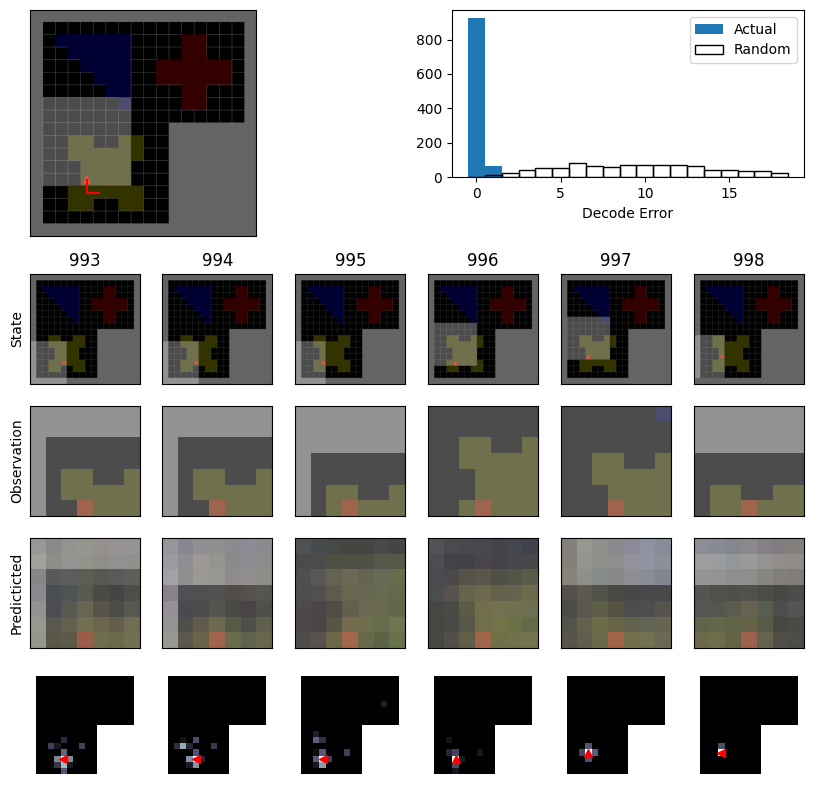

In [7]:
#[11, 26, 26, 39, 46, 52, 63, 69, 74]
seed = 69 #just happened to be a trajectory that got included walls and the view was fully in the environment o_0
env.seed(seed)
predictiveNet.calculateDecodingPerformance(env,agent,decoder,
                                            savename=netname, savefolder=savefolder,
                                          trajectoryWindow=5, seed=seed,
                                          timesteps=1000)

In [8]:
STA = SpatialTuningAnalysis(predictiveNet,inputControl=True, untrainedControl=True)

Getting Tuning Curves for Input Units
Running Untrained Control


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Running WAKE


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: divide by zero encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))
/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/SpatialTuningAnalysis.py:150: RuntimeWarning: invalid value encountered in divide
  EVSpace = 1 - np.var(spaceRemoved,axis=0) / (np.var(WAKE_h,axis=0))


Running WAKE
Calculating EV_s
Calculating EV_s for input control


In [9]:
_, _, untrained_decoder = STA.pNControl.calculateSpatialRepresentation(env,agent,
                                             trainDecoder=True, trainHDDecoder = False)

/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Training Decoder on cuda...
loss: 5.880133 [    0\ 5000]
loss: 2.639874 [  500\ 5000]
loss: 2.009322 [ 1000\ 5000]
loss: 1.699915 [ 1500\ 5000]
loss: 1.493093 [ 2000\ 5000]
loss: 1.353594 [ 2500\ 5000]
loss: 1.250810 [ 3000\ 5000]
loss: 1.187478 [ 3500\ 5000]
loss: 1.124385 [ 4000\ 5000]
loss: 1.072545 [ 4500\ 5000]
loss: 1.029278 [ 4999\ 5000]
Training Complete. Back to the cpu


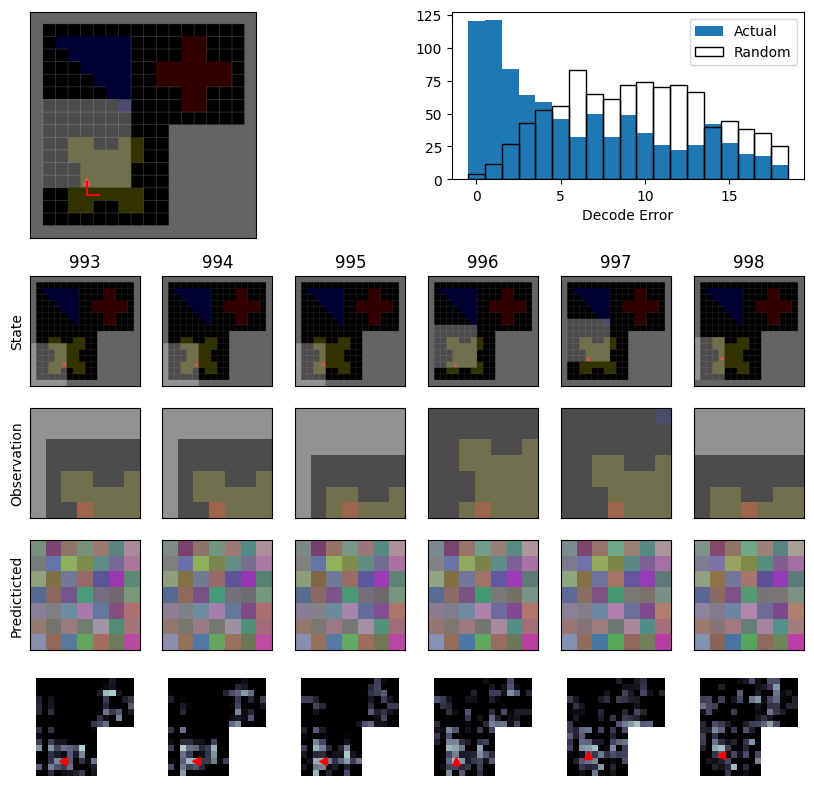

In [125]:
env.seed(seed)
STA.pNControl.calculateDecodingPerformance(env,agent,untrained_decoder,
                                            savename='untrained', savefolder=savefolder,
                                          trajectoryWindow=5,
                                          timesteps=1000, seed=seed)

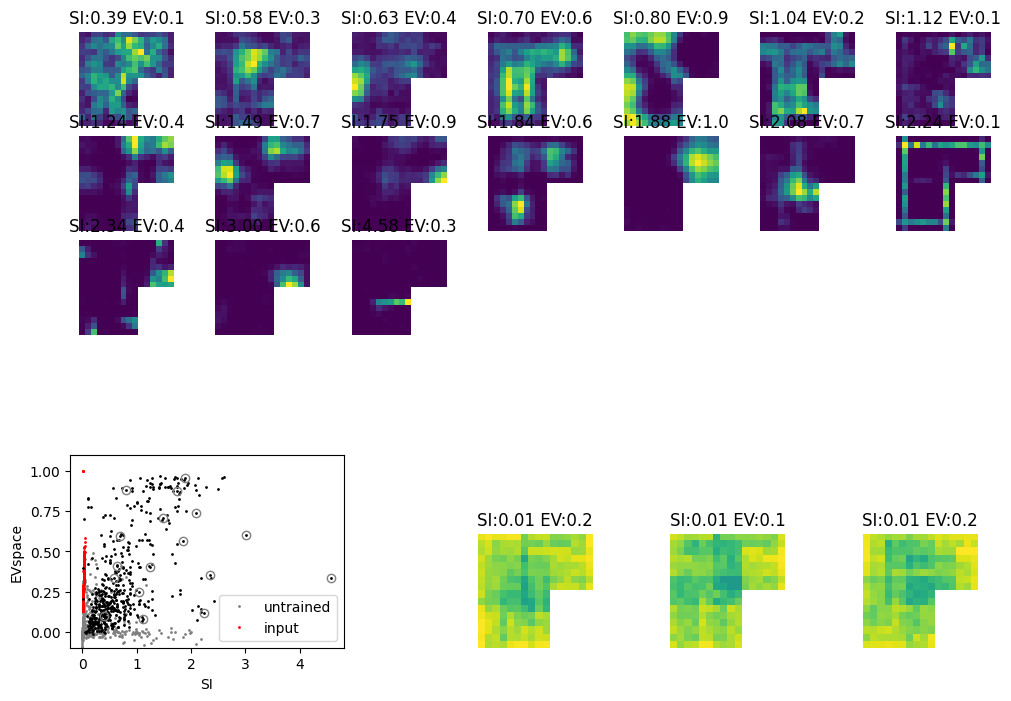

In [130]:
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5, seed=3)

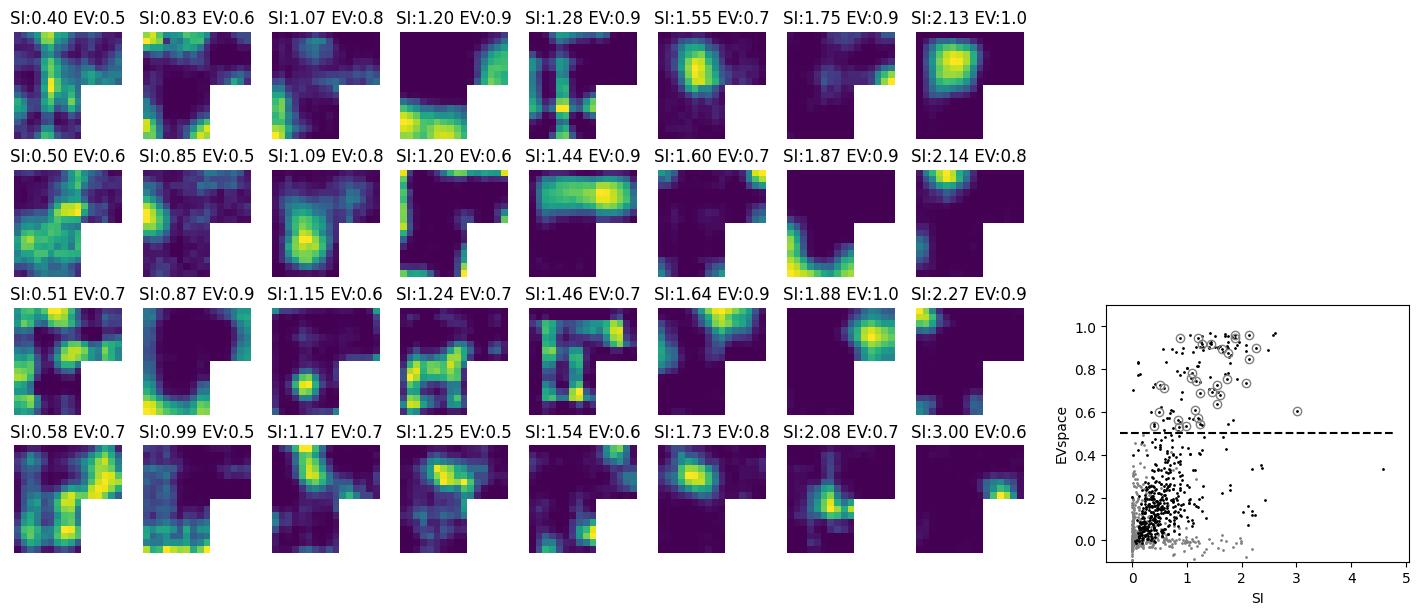

In [139]:
#5,6,8,15
STA.TCExamplesFigure(netname,savefolder, seed=15)

In [165]:
noisestd = 0.5
OTA = OfflineTrajectoryAnalysis(predictiveNet, noisemag = 0, noisestd=noisestd,
                               withIsomap=False, decoder=decoder, actionAgent=None,
                               compareWake=True,timesteps_wake = 5000,
                               calculateViewSimilarity=True)

Running SLEEP
Running WAKE


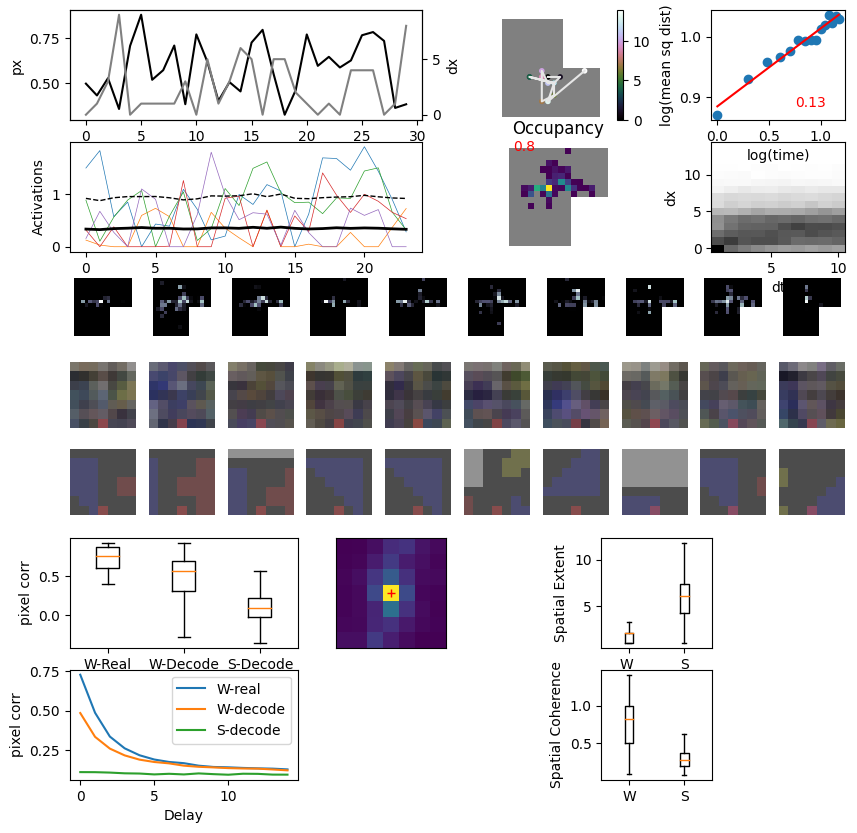

In [186]:
OTA.SpontTrajectoryFigure(netname,savefolder,trajRange = (110,125))

In [167]:
DRA = DiffusionReplayAnalysis(predictiveNet, decoder = decoder,
                            compareWake=True, actionAgent=None,
                              noisestd = noisestd)

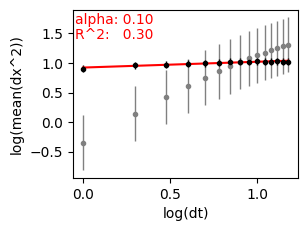

In [168]:
DRA.DiffusionFigure(netname,savefolder,halflims=False)

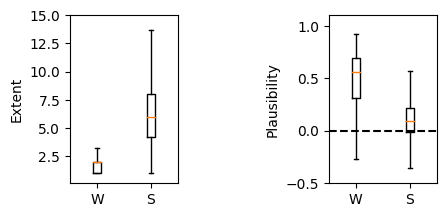

In [187]:
extent = [OTA.spatialCoherence_WAKE['extent'],
                    DRA.extent.flatten()]
view = [OTA.ViewSimilarity['MSE_wake'][0],
            OTA.ViewSimilarity['MSE_sleep'][0]]

plt.figure()
plt.subplot(2,4,1)
plt.boxplot(extent,
           showfliers=False,
           labels=['W','S'])
plt.ylim([0.09,15])
plt.ylabel('Extent')

plt.subplot(2,4,3)
plt.boxplot(view,
           showfliers=False,
           labels=['W','S'])
plt.plot(plt.xlim(),[0,0],'k--')
plt.ylim([-0.5,1.1])
plt.ylabel('Plausibility')

#plt.tight_layout()
saveFig(plt.gcf(),netname+'_ExtentPlaus',savefolder,
        filetype='pdf')

In [24]:
#from utils.figures import TrainingFigure
#TrainingFigure(predictiveNet,savename=netname,savefolder=savefolder)

In [6]:
nettypes = ['AutoencoderPred_LN']
hpidx = ['0','1','2','3','4','5','6','7','8','9','10',
         '11','12','13','14','15','16','17','18','19',
        '20','21','22','23','24']
seeds = ['0','1','2','3','4','5','6','7','8','9']


netprops = itertools.product(*[nettypes,['-'],hpidx,['-s'],seeds])
netprops = list(netprops)
netnames = [''.join(name) for name in netprops]
nettype = [name[0] for name in netprops]
netfolder = '/hyperparm_panel_sparse/'

analysisFrame_hparm = pd.DataFrame(data={'filename':netnames, 'type':nettype,
                                        'netfolder':netfolder})

In [7]:
aEncs = ['Onehot','SpeedHD','Velocities','NoAct']
seeds = ['100','101','102','103','104','105','106','107','108']

netprops = itertools.product(*[nettypes,['-'],aEncs,['-s'],seeds])
netprops = list(netprops)
netnames = [''.join(name) for name in netprops]
nettype = [name[0] for name in netprops]
#netmask = [name[4] for name in netprops]
netAE = [name[2] for name in netprops]
netseed = [int(name[4]) for name in netprops]
netfolder = '/Autoencoder_sparse_panel/'


analysisFrame_sparse = pd.DataFrame(data={'filename':netnames, 'type':'N-S (+LN)', 'ActionEnc':netAE, 'seed':netseed,
                                      'netfolder':netfolder})

In [8]:
#netfolder = '/hyperparm_panel_sparse/'
def loadNet(row):
    try:
        net = PredictiveNet.loadNet(row['netfolder']+row['filename'],suppressText=True)
        return net
    except:
        print(f"{row['filename']} does not exist")
        #net = PredictiveNet
        

analysisFrame_hparm['net'] = analysisFrame_hparm.apply(loadNet, axis = 1)
analysisFrame_hparm = analysisFrame_hparm.dropna()
analysisFrame_sparse['net'] = analysisFrame_sparse.apply(loadNet, axis = 1)


In [9]:
def getPredPerformance(row):
    predictiveNet = row['net']
    try:
        finalLoss = predictiveNet.TrainingSaver['loss'].values[-1]
    except:
        finalLoss = predictiveNet.TrainingSaver['loss']
    
    return finalLoss 

analysisFrame_hparm['finalLoss'] = analysisFrame_hparm.apply(getPredPerformance, axis = 1)
analysisFrame_sparse['finalLoss'] = analysisFrame_sparse.apply(getPredPerformance, axis = 1)

In [10]:
#Calculate spatial info and decoding performance
def getSpatialRep(row):
    predictiveNet = row['net']
    #print(len(predictiveNet.TrainingSaver['sRSA'].values))
    try:
        SI = predictiveNet.TrainingSaver['SI'].values[-1]
        sRSA = predictiveNet.TrainingSaver['sRSA'].values[-1]

        EVs = predictiveNet.TrainingSaver['EVs'].values[-1]
        
        SWdist = predictiveNet.TrainingSaver['SWdist'].values[-1]
        finalLoss = predictiveNet.TrainingSaver['loss'].values[-1]
        derror = predictiveNet.TrainingSaver['derror'].values[-1]
    except:
        SI = predictiveNet.TrainingSaver['SI']
        sRSA = predictiveNet.TrainingSaver['sRSA']

        EVs = predictiveNet.TrainingSaver['EVs']
        
        SWdist = predictiveNet.TrainingSaver['SWdist']
        finalLoss = predictiveNet.TrainingSaver['loss']
        derror = predictiveNet.TrainingSaver['derror']
        
    meanSI = np.nanmean(SI)
    EVsp50 = np.nanmean(EVs>0.5)
    tunedSI = np.nanmean(SI[EVs>0.5])
    derror = np.nanmean(derror)
    
    return SI, meanSI, sRSA, EVs, EVsp50, finalLoss, SWdist, tunedSI, derror
analysisFrame_hparm[['SI','meanSI','sRSA','EVs','EVs50','finalLoss','SWdist','tunedSI','derror']] = analysisFrame_hparm.apply(getSpatialRep, axis = 1, result_type="expand")
analysisFrame_sparse[['SI','meanSI','sRSA','EVs','EVs50','finalLoss','SWdist','tunedSI','derror']] = analysisFrame_sparse.apply(getSpatialRep, axis = 1, result_type="expand")

In [11]:
exampleNet = pd.DataFrame(index=[0], data={'filename':netfolder+netname+'-Onehot-s'+str(exseed), 'type':netname})
exampleNet['net'] = predictiveNet
exampleNet['finalLoss'] = exampleNet.apply(getPredPerformance, axis = 1)
exampleNet[['SI','meanSI','sRSA','EVs','EVs50','finalLoss','SWdist','tunedSI','derror']] = exampleNet.apply(getSpatialRep, axis = 1, result_type="expand")



In [12]:
#analysisFrame['net'][0].trainArgs
def getTrainParms(row):
    predictiveNet = row['net']
    lr = predictiveNet.trainArgs.lr
    seed = predictiveNet.trainArgs.seed
    weight_decay = predictiveNet.trainArgs.weight_decay
    bptttrunc = predictiveNet.trainArgs.bptttrunc
    seqdur = predictiveNet.trainArgs.seqdur
    dropp = predictiveNet.trainArgs.dropout
    ntimescale = predictiveNet.trainArgs.ntimescale
    nneurons = predictiveNet.trainArgs.hiddensize
    noisestd = predictiveNet.trainArgs.noisestd
    
    return lr,bptttrunc,seqdur,seed,dropp,ntimescale,weight_decay,nneurons,noisestd
analysisFrame_hparm[['lr','bptt','seqdur','seed','dropp','ntimescale','weight_decay','nneurons','noisestd']] = analysisFrame_hparm.apply(getTrainParms, axis = 1, result_type="expand")
exampleNet[['lr','bptt','seqdur','seed','dropp','ntimescale','weight_decay','nneurons','noisestd']] = exampleNet.apply(getTrainParms, axis = 1, result_type="expand")



In [52]:
data = analysisFrame_sparse[analysisFrame_sparse['ActionEnc']=='Onehot'][['finalLoss','EVs50']]

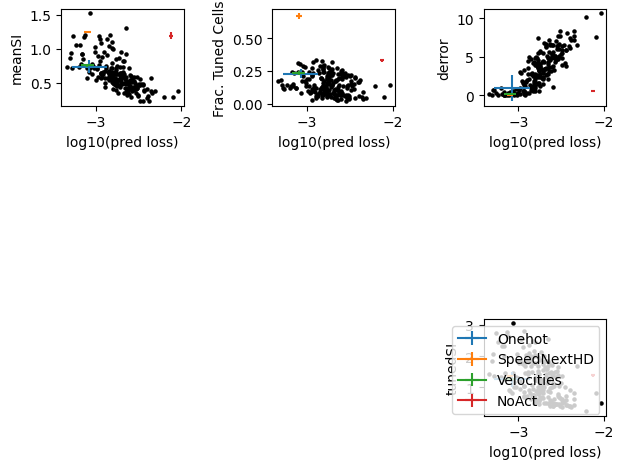

In [13]:
plt.figure()
plt.subplot(3,3,1)
plt.scatter(np.log10(analysisFrame_hparm['finalLoss']),
            analysisFrame_hparm['meanSI'],
            color='k',s=5)
for aidx,act in enumerate(analysisFrame_sparse['ActionEnc'].unique()):
    data = analysisFrame_sparse[analysisFrame_sparse['ActionEnc']==act][['finalLoss','meanSI']]
    plt.errorbar(np.mean(np.log10(data.finalLoss)),
                np.mean(data.meanSI),
                 np.std(data.meanSI),
                np.std(np.log10(data.finalLoss)))
#plt.scatter(np.log10(exampleNet['finalLoss']),exampleNet['meanSI'],
#            c='r',marker='*')
           ##c=np.log10(exampleNet[h]),marker='*')

plt.xlabel('log10(pred loss)')
plt.ylabel('meanSI')
#plt.xlim([-4.1,-2.25])

plt.subplot(3,3,2)
plt.scatter(np.log10(analysisFrame_hparm['finalLoss']),
            analysisFrame_hparm['EVs50'],
            color='k',s=5)
for aidx,act in enumerate(analysisFrame_sparse['ActionEnc'].unique()):
    data = analysisFrame_sparse[analysisFrame_sparse['ActionEnc']==act][['finalLoss','EVs50']]
    plt.errorbar(np.mean(np.log10(data.finalLoss)),
                np.mean(data.EVs50),
                np.std(data.EVs50),
                np.std(np.log10(data.finalLoss)))
#plt.scatter(np.log10(exampleNet['finalLoss']),exampleNet['EVs50'],
#            c='r',marker='*')
           ##c=np.log10(exampleNet[h]),marker='*')

plt.xlabel('log10(pred loss)')
plt.ylabel('Frac. Tuned Cells')

plt.subplot(3,3,3)
plt.scatter(np.log10(analysisFrame_hparm['finalLoss']),
            analysisFrame_hparm['derror'],
            color='k',s=5)
for aidx,act in enumerate(analysisFrame_sparse['ActionEnc'].unique()):
    data = analysisFrame_sparse[analysisFrame_sparse['ActionEnc']==act][['finalLoss','derror']]
    plt.errorbar(np.mean(np.log10(data.finalLoss)),
                np.mean(data.derror),
                 np.std(data.derror),
                np.std(np.log10(data.finalLoss)))
#plt.scatter(np.log10(exampleNet['finalLoss']),exampleNet['derror'],
#            c='r',marker='*')
           ##c=np.log10(exampleNet[h]),marker='*')

plt.xlabel('log10(pred loss)')
plt.ylabel('derror')


plt.subplot(3,3,9)
plt.scatter(np.log10(analysisFrame_hparm['finalLoss']),
            analysisFrame_hparm['tunedSI'],
            color='k',s=5)
for aidx,act in enumerate(analysisFrame_sparse['ActionEnc'].unique()):
    data = analysisFrame_sparse[analysisFrame_sparse['ActionEnc']==act][['finalLoss','tunedSI']]
    plt.errorbar(np.mean(np.log10(data.finalLoss)),
                np.mean(data.tunedSI),
                np.std(data.tunedSI),
                np.std(np.log10(data.finalLoss)),label=act)
plt.legend()
#plt.scatter(np.log10(exampleNet['finalLoss']),exampleNet['tunedSI'],
#            c='r',marker='*')
           ##c=np.log10(exampleNet[h]),marker='*')

plt.xlabel('log10(pred loss)')
plt.ylabel('tunedSI')
#plt.xlim([-4.1,-2.25])

plt.tight_layout()

saveFig(plt.gcf(),'HParmSweep',savefolder,
        filetype='pdf')

plt.show()

In [33]:
#Sleep metrics (spatial coherence, view similarity) compare wake/sleep all nets
#diffusion alpha vs SI